### Bitcoin Analysis Using Blockchain.info and BitcoinWhosWho

In the process of performing my initial blockchain research, I wanted to work analysis of the Bitcoin blockchain into my larger research project. However, 

In [1]:
# import library for blockchain.info API
from bitcoin import *

In [2]:
# now we're going to look as a Bitcoin address
# pull the history for the address's transactions
hist = history('1FfmbHfnpaZjKFvyi1okTjJJusN455paPH')

'''
address is the queried address on the Bitcoin blockchain
block_height is the block upon which this transaction occured
output is the transaction hash for the transfer of Bitcoin
value is the amount of Bitcoin in Satoshis (100 million Satoshis to 1 Bitcoin)

I wanted to exams this address which allegedly belonged to Dread Pirate Roberts:
https://blockchain.info/address/1FfmbHfnpaZjKFvyi1okTjJJusN455paPH

1FfmbHfnpaZjKFvyi1okTjJJusN455paPH

These are other potential projects:

1i7cZdoE9NcHSdAL5eGjmTJbBVqeQDwgw # DPR seized coins 2
1AypmAi6ZXfhbGRWDpNYZQCjREGpkW5E6y # other address used by FBI
'''

Fetching more transactions... 50
Fetching more transactions... 100
Fetching more transactions... 150
Fetching more transactions... 200
Fetching more transactions... 250
Fetching more transactions... 300
Fetching more transactions... 350
Fetching more transactions... 400
Fetching more transactions... 450
Fetching more transactions... 500
Fetching more transactions... 550
Fetching more transactions... 600
Fetching more transactions... 650
Fetching more transactions... 700


'\naddress is the queried address on the Bitcoin blockchain\nblock_height is the block upon which this transaction occured\noutput is the transaction hash for the transfer of Bitcoin\nvalue is the amount of Bitcoin in Satoshis (100 million Satoshis to 1 Bitcoin)\n\nI wanted to exams this address which allegedly belonged to Dread Pirate Roberts:\nhttps://blockchain.info/address/1FfmbHfnpaZjKFvyi1okTjJJusN455paPH\n\n1FfmbHfnpaZjKFvyi1okTjJJusN455paPH\n\nThese are other potential projects:\n\n12cUHS93ZLNHqGmnUNgFecNNowYwVNy2Gi\n1AF9hWRVHF2kdVCtrxmFUjLzB6tNuYqqpX\n'

In [3]:
len(hist)

737

### Analysis of address history

In [4]:
# import the libraries for analysis of Bitcoin data
from pandas.io.json import json_normalize
import pandas as pd

In [5]:
# bring API output into dataframe
hist_df = json_normalize(hist)
hist_df.head(5)

,address,block_height,output,spend,value
0,1FfmbHfnpaZjKFvyi1okTjJJusN455paPH,265915,7926f73eb5c233f90ffd060686c02d6cff49f66ad33b5d...,50bd7b27e3f55ceb68738acfd91352e3706556d9e111ea...,32400000000
1,1FfmbHfnpaZjKFvyi1okTjJJusN455paPH,265873,7aa5f401afc6392a17726e7750b1df2294afc36e00e38a...,796684ce2c46c73eec4e67a4bd530603c2e05298550801...,32400000000
2,1FfmbHfnpaZjKFvyi1okTjJJusN455paPH,265886,ca7c7bcf9001355dc4e8dc8248e0b964332662a2e34151...,796684ce2c46c73eec4e67a4bd530603c2e05298550801...,32400000000
3,1FfmbHfnpaZjKFvyi1okTjJJusN455paPH,269637,534bd2f7d7962c4b1e86ba511a4b08b86b7dcdc7451254...,50bd7b27e3f55ceb68738acfd91352e3706556d9e111ea...,10000
4,1FfmbHfnpaZjKFvyi1okTjJJusN455paPH,265896,3701e153885d9529bbe886e630e65aaaf906e86714c5a5...,50bd7b27e3f55ceb68738acfd91352e3706556d9e111ea...,32400000000


In [8]:
# Create a copy of the original DPR address query
df = hist_df.copy()
# Verify the number of transactions
df.address.value_counts()

1FfmbHfnpaZjKFvyi1okTjJJusN455paPH    737
Name: address, dtype: int64

In [9]:
# examine transactions made by this account
spend_count = df.spend.value_counts()
spend_count.head()

50bd7b27e3f55ceb68738acfd91352e3706556d9e111ea40818bfb2b431dc45b:169    1
50bd7b27e3f55ceb68738acfd91352e3706556d9e111ea40818bfb2b431dc45b:45     1
796684ce2c46c73eec4e67a4bd530603c2e0529855080187cde241a6b06c2a5b:349    1
50bd7b27e3f55ceb68738acfd91352e3706556d9e111ea40818bfb2b431dc45b:28     1
50bd7b27e3f55ceb68738acfd91352e3706556d9e111ea40818bfb2b431dc45b:159    1
Name: spend, dtype: int64

In [10]:
# examine unique transaction:sequence number
len(df.spend.unique())

598

In [11]:
# split the transaction hash from the sequence number 
df['spend_hash'] = df['spend'].str.split(':').str[0]
df['spend_post'] = df['spend'].str.split(':').str[1]

In [12]:
df.head()

,address,block_height,output,spend,value,spend_hash,spend_post
0,1FfmbHfnpaZjKFvyi1okTjJJusN455paPH,265915,7926f73eb5c233f90ffd060686c02d6cff49f66ad33b5d...,50bd7b27e3f55ceb68738acfd91352e3706556d9e111ea...,32400000000,50bd7b27e3f55ceb68738acfd91352e3706556d9e111ea...,153
1,1FfmbHfnpaZjKFvyi1okTjJJusN455paPH,265873,7aa5f401afc6392a17726e7750b1df2294afc36e00e38a...,796684ce2c46c73eec4e67a4bd530603c2e05298550801...,32400000000,796684ce2c46c73eec4e67a4bd530603c2e05298550801...,368
2,1FfmbHfnpaZjKFvyi1okTjJJusN455paPH,265886,ca7c7bcf9001355dc4e8dc8248e0b964332662a2e34151...,796684ce2c46c73eec4e67a4bd530603c2e05298550801...,32400000000,796684ce2c46c73eec4e67a4bd530603c2e05298550801...,111
3,1FfmbHfnpaZjKFvyi1okTjJJusN455paPH,269637,534bd2f7d7962c4b1e86ba511a4b08b86b7dcdc7451254...,50bd7b27e3f55ceb68738acfd91352e3706556d9e111ea...,10000,50bd7b27e3f55ceb68738acfd91352e3706556d9e111ea...,26
4,1FfmbHfnpaZjKFvyi1okTjJJusN455paPH,265896,3701e153885d9529bbe886e630e65aaaf906e86714c5a5...,50bd7b27e3f55ceb68738acfd91352e3706556d9e111ea...,32400000000,50bd7b27e3f55ceb68738acfd91352e3706556d9e111ea...,7


In [14]:
# We can now see the two transactions that accumulated ~144000 BTC for the FBI
df.spend_hash.value_counts()

796684ce2c46c73eec4e67a4bd530603c2e0529855080187cde241a6b06c2a5b    374
50bd7b27e3f55ceb68738acfd91352e3706556d9e111ea40818bfb2b431dc45b    223
Name: spend_hash, dtype: int64

In [17]:
# We can now look at the individual transaction hashs that allowed the FBI to tumble the BTC into seized accounts 
output_count = df.output.value_counts()
output_count.head()

5e07f07edbba07da566ea6c94cae7ff1fa3658b2ff24b0943072a9a0c5b51d47:1    1
29b10cf64c5d86e0b8191fd9a37820b5b979be3d10a09fd5abcb5e763e6eb1cb:1    1
8a3c6b3dd1a7d0e4d6162e855cd7dcfb89887ccfec08ffaf5490a4269b2a79d0:1    1
55488979d4f894b7df74a41a5938a81532b47ed97c033138d73850f009339a26:0    1
25bba051aebe7b9b767a345da4dfa6b26036b3e9bbb58c629d2a08710efd1405:0    1
Name: output, dtype: int64

In [18]:
# split the transaction hash from the sequence number 
df['output_hash'] = df['output'].str.split(':').str[0]
# if you need the other part, uncomment below
#df['output_post'] = df['output'].str.split(':').str[1]
df.head()

,address,block_height,output,spend,value,spend_hash,spend_post,output_hash
0,1FfmbHfnpaZjKFvyi1okTjJJusN455paPH,265915,7926f73eb5c233f90ffd060686c02d6cff49f66ad33b5d...,50bd7b27e3f55ceb68738acfd91352e3706556d9e111ea...,32400000000,50bd7b27e3f55ceb68738acfd91352e3706556d9e111ea...,153,7926f73eb5c233f90ffd060686c02d6cff49f66ad33b5d...
1,1FfmbHfnpaZjKFvyi1okTjJJusN455paPH,265873,7aa5f401afc6392a17726e7750b1df2294afc36e00e38a...,796684ce2c46c73eec4e67a4bd530603c2e05298550801...,32400000000,796684ce2c46c73eec4e67a4bd530603c2e05298550801...,368,7aa5f401afc6392a17726e7750b1df2294afc36e00e38a...
2,1FfmbHfnpaZjKFvyi1okTjJJusN455paPH,265886,ca7c7bcf9001355dc4e8dc8248e0b964332662a2e34151...,796684ce2c46c73eec4e67a4bd530603c2e05298550801...,32400000000,796684ce2c46c73eec4e67a4bd530603c2e05298550801...,111,ca7c7bcf9001355dc4e8dc8248e0b964332662a2e34151...
3,1FfmbHfnpaZjKFvyi1okTjJJusN455paPH,269637,534bd2f7d7962c4b1e86ba511a4b08b86b7dcdc7451254...,50bd7b27e3f55ceb68738acfd91352e3706556d9e111ea...,10000,50bd7b27e3f55ceb68738acfd91352e3706556d9e111ea...,26,534bd2f7d7962c4b1e86ba511a4b08b86b7dcdc7451254...
4,1FfmbHfnpaZjKFvyi1okTjJJusN455paPH,265896,3701e153885d9529bbe886e630e65aaaf906e86714c5a5...,50bd7b27e3f55ceb68738acfd91352e3706556d9e111ea...,32400000000,50bd7b27e3f55ceb68738acfd91352e3706556d9e111ea...,7,3701e153885d9529bbe886e630e65aaaf906e86714c5a5...


In [20]:
# We can now see the individual transaction hashes that accumulated ~144000 BTC for the FBI
df.output_hash.value_counts().head()

4182012f648ab16d575d9d6ac4ebd917dad40c5a6bb1661be59d276962115079    1
1e8ace8bcf91d51e95423d69a0f3d6aa1cec63514e3920325dd2eb8bb16581d6    1
fca0479ff4bcba678af886c5cb80ab15720a9585598213e7a4090377a6dc0df7    1
89900975c8face1088ae667670061deaf2ff1cda3af3e7b05a796bf4ae5b7bd9    1
1c1699ea25dbd473094311352c193b63dc7f3ac1b3042ae792ae246823f59064    1
Name: output_hash, dtype: int64

## Graph of Bitcoin from Origin Address

In [23]:
# import networkx and plot libraries
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

In [25]:
# create a new table with addresses and spend hashes
# relabel table rows on unique addresses + spend hashes
# reindex table with row labels
df_adjacency = pd.crosstab(df.address, df.spend_hash)
idx = df_adjacency.columns.union(df.address.unique())
df_adjacency = df_adjacency.reindex(index=idx, columns=idx, fill_value=0)

In [26]:
idx

Index(['1FfmbHfnpaZjKFvyi1okTjJJusN455paPH',
       '50bd7b27e3f55ceb68738acfd91352e3706556d9e111ea40818bfb2b431dc45b',
       '796684ce2c46c73eec4e67a4bd530603c2e0529855080187cde241a6b06c2a5b'],
      dtype='object')

In [27]:
df_adjacency

,1FfmbHfnpaZjKFvyi1okTjJJusN455paPH,50bd7b27e3f55ceb68738acfd91352e3706556d9e111ea40818bfb2b431dc45b,796684ce2c46c73eec4e67a4bd530603c2e0529855080187cde241a6b06c2a5b
1FfmbHfnpaZjKFvyi1okTjJJusN455paPH,0,223,374
50bd7b27e3f55ceb68738acfd91352e3706556d9e111ea40818bfb2b431dc45b,0,0,0
796684ce2c46c73eec4e67a4bd530603c2e0529855080187cde241a6b06c2a5b,0,0,0


In [28]:
# created a directed graph of our table
dpr_graph = nx.DiGraph(df_adjacency.values)

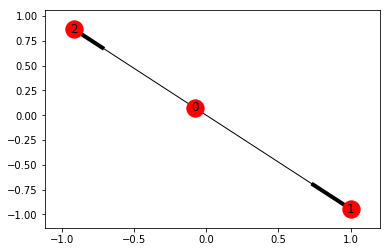

In [30]:
# plot the network
nx.draw_networkx(dpr_graph, with_labels=True)